In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Survived'].corr(df['Pclass'].dropna())

-0.3384810359610148

In [5]:
df['Survived'].corr(df['Age'].dropna())

-0.07722109457217768

In [6]:
df['Survived'].corr(df['Fare'])

0.2573065223849625

In [7]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
df = df.drop(['PassengerId'], axis=1)

In [9]:
genders = {"male": 1, "female": 0}
df['Sex'] = df['Sex'].map(genders)

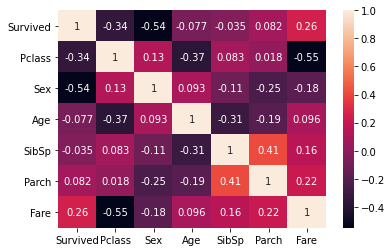

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(df.corr(), annot=True)
plt.show()

In [11]:
df['Survived'].corr(df['Fare'])

0.2573065223849625

In [12]:
df['Survived'].corr(df['Sex'].astype('category').cat.codes)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df['Sex'].astype('category').cat.codes

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

In [14]:
df['Age'].corr(df['Survived'])

-0.07722109457217768

In [15]:
children = df[df['Age'] < 16]
children.shape

(83, 11)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1183ea6d0>,
      dtype=object)

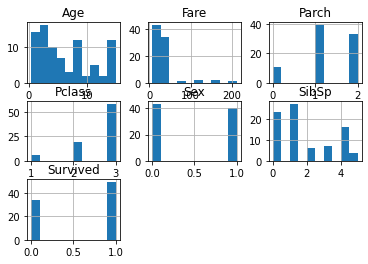

In [16]:
children.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118449890>,
      dtype=object)

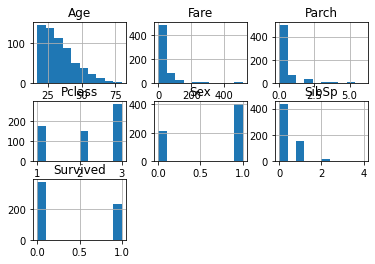

In [17]:
adults = df[df['Age'] > 16]
adults.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1187fc390>,
      dtype=object)

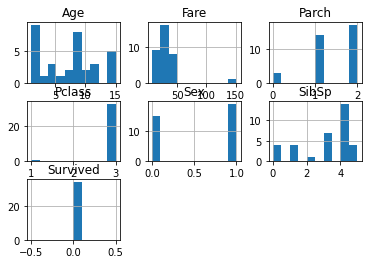

In [18]:
dead_children = df[(df['Age'] < 16) & (df['Survived'] == 0)]
dead_children.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118dd3a10>,
      dtype=object)

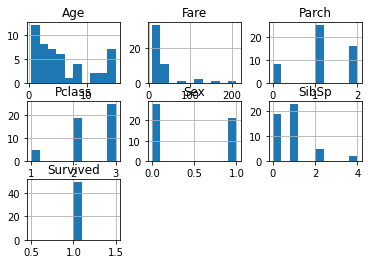

In [19]:
living_children = df[(df['Age'] < 16) & (df['Survived'] == 1)]
living_children.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118dd31d0>,
      dtype=object)

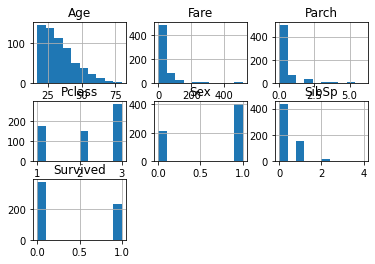

In [20]:
adults = df[df['Age'] > 16]
adults.hist()

In [21]:
adults.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.387916,-0.583954,0.008448,0.124374,0.081712,0.298164
Pclass,-0.387916,1.000000,0.190708,-0.354128,-0.151219,-0.028704,-0.552570
Sex,-0.583954,0.190708,1.000000,0.046081,-0.201262,-0.266541,-0.207448
Age,0.008448,-0.354128,0.046081,1.000000,-0.029750,0.048961,0.107145
SibSp,0.124374,-0.151219,-0.201262,-0.029750,1.000000,0.267826,0.237674
Parch,0.081712,-0.028704,-0.266541,0.048961,0.267826,1.000000,0.218238
Fare,0.298164,-0.552570,-0.207448,0.107145,0.237674,0.218238,1.000000


In [22]:
children.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.426012,-0.128191,-0.150822,-0.662057,-0.180206,0.003809
Pclass,-0.426012,1.000000,-0.002361,0.072007,0.370101,-0.195867,-0.703094
Sex,-0.128191,-0.002361,1.000000,-0.185238,0.290206,0.120807,0.046239
Age,-0.150822,0.072007,-0.185238,1.000000,-0.057113,-0.313264,0.069053
SibSp,-0.662057,0.370101,0.290206,-0.057113,1.000000,0.325418,0.040525
Parch,-0.180206,-0.195867,0.120807,-0.313264,0.325418,1.000000,0.339464
Fare,0.003809,-0.703094,0.046239,0.069053,0.040525,0.339464,1.000000


In [32]:

women_and_children = df[(df['Sex'] == 0) | (df['Age'] < 16)]
women_and_children
w_a_c_survival_rate = women_and_children['Survived'].value_counts(normalize=True) * 100
w_a_c_survival_rate


1    71.751412
0    28.248588
Name: Survived, dtype: float64

In [33]:
adult_men = df[(df['Sex'] == 1) & (df['Age'] > 16)]
a_m_survival_rate = adult_men['Survived'].value_counts(normalize=True) * 100
a_m_survival_rate

0    82.338308
1    17.661692
Name: Survived, dtype: float64

In [34]:
children = df[df['Age'] < 16]
child_survival_rate = children['Survived'].value_counts(normalize=True) * 100
child_survival_rate

1    59.036145
0    40.963855
Name: Survived, dtype: float64

In [56]:
women = df[(df['Sex'] == 0) & (df['Age'] > 16)]
women_survival_rate = women['Survived'].value_counts(normalize=True) * 100
women_survival_rate

1    77.358491
0    22.641509
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e54ef10>,
      dtype=object)

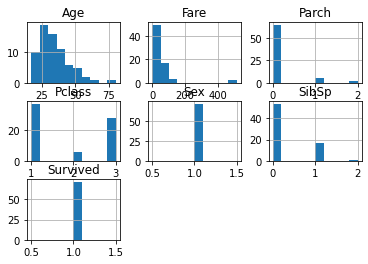

In [78]:
surviving_men = df[(df['Sex'] ==  1) & (df['Age'] > 16) & (df['Survived'] == 1)]
surviving_men.hist()

In [79]:
dead_men = df[(df['Sex'] == 1) & (df['Age'] > 16) & (df['Survived'] == 0)]

In [80]:
surviving_men.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,71.0,71.000000,71.0,71.000000,71.000000,71.000000,71.000000
mean,1.0,1.873239,1.0,34.323944,0.267606,0.126761,46.731869
std,0.0,0.955130,0.0,11.798032,0.476827,0.411602,85.316448
min,1.0,1.000000,1.0,17.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,1.0,26.500000,0.000000,0.000000,8.050000
50%,1.0,1.000000,1.0,32.000000,0.000000,0.000000,26.550000
75%,1.0,3.000000,1.0,41.000000,0.500000,0.000000,54.270850
max,1.0,3.000000,1.0,80.000000,2.000000,2.000000,512.329200


In [81]:
dead_men.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,331.0,331.000000,331.0,331.000000,331.000000,331.000000,331.000000
mean,0.0,2.383686,1.0,33.496979,0.250755,0.166163,22.562523
std,0.0,0.779028,0.0,12.970596,0.516947,0.566384,33.570494
min,0.0,1.000000,1.0,17.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,1.0,23.000000,0.000000,0.000000,7.854200
50%,0.0,3.000000,1.0,30.000000,0.000000,0.000000,10.170800
75%,0.0,3.000000,1.0,40.500000,0.000000,0.000000,26.000000
max,0.0,3.000000,1.0,74.000000,3.000000,5.000000,263.000000


In [82]:
surviving_men.Fare.median()

26.55

In [83]:
dead_men.Fare.median()

10.1708

In [84]:
surviving_men.Fare.median()/dead_men.Fare.median()

2.610414126715696

In [85]:
surviving_men.Fare.mean()/dead_men.Fare.mean()

2.071216491222039

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e94c550>,
      dtype=object)

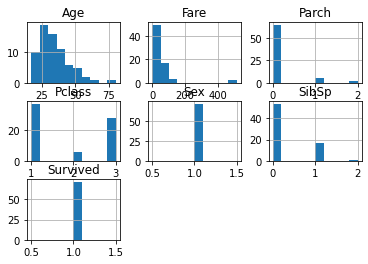

In [86]:
surviving_men.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e962110>,
      dtype=object)

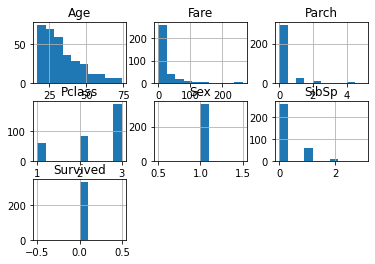

In [87]:
dead_men.hist()

In [88]:
dead_men.Pclass.median()/surviving_men.Pclass.median()

3.0

In [89]:
third_class_adult_men = df[(df['Sex'] == 1) & (df['Age'] > 16) & (df['Pclass'] == 3)]
thrird_class_adult_men_survival_rate = third_class_adult_men['Survived'].value_counts(normalize=True) * 100
thrird_class_adult_men_survival_rate

0    87.037037
1    12.962963
Name: Survived, dtype: float64

In [90]:
first_class_adult_men = df[(df['Sex'] == 1) & (df['Age'] > 16) & (df['Pclass'] == 1)]
first_class_adult_men_survival_rate = first_class_adult_men['Survived'].value_counts(normalize=True) * 100
first_class_adult_men_survival_rate

0    62.244898
1    37.755102
Name: Survived, dtype: float64

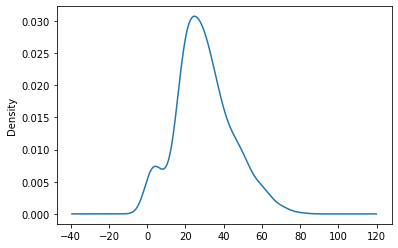

In [91]:
df.Age.plot.kde()

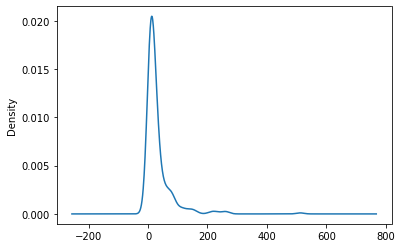

In [92]:
df.Fare.plot.kde()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


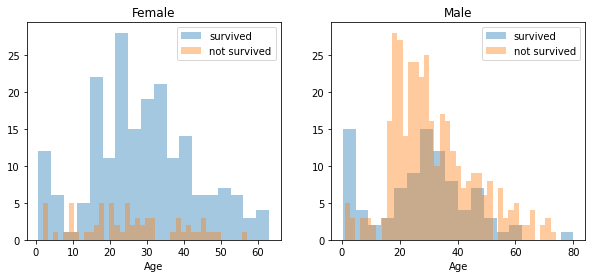

In [95]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']==0]
men = df[df['Sex']==1]

ax = sn.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sn.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sn.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sn.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')



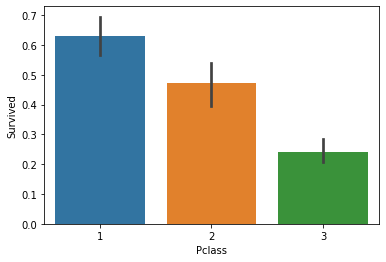

In [96]:
sn.barplot(x='Pclass', y='Survived', data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f29fa10>,
      dtype=object)

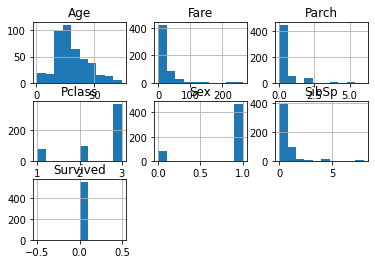

In [97]:
the_dead = df[df["Survived"] == 0]
the_dead.hist()

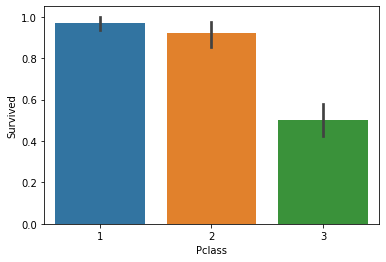

In [98]:
sn.barplot(x='Pclass', y='Survived', data=women)

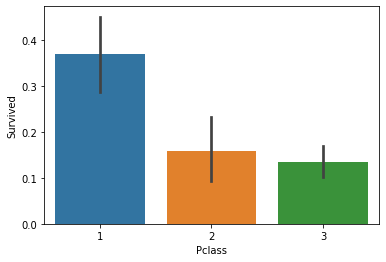

In [99]:
sn.barplot(x='Pclass', y='Survived', data=men)

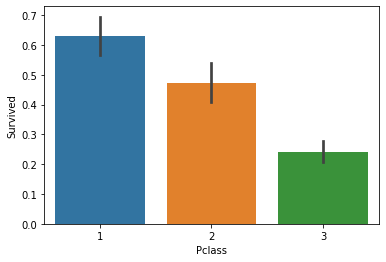

In [100]:
sn.barplot(x='Pclass', y='Survived', data=df)

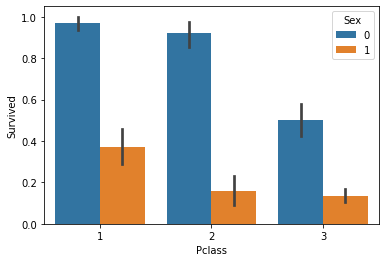

In [101]:
sn.barplot(x='Pclass', y='Survived', hue="Sex", data=df)

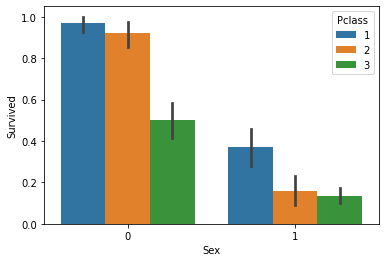

In [102]:
sn.barplot(x='Sex', y='Survived', hue="Pclass", data=df)

In [103]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [109]:
children = df[df['Age'] < 16]
surviving_children = df[(df['Age'] < 16) & (df['Survived'] == 1)]
# surviving_children.count()
child_chance_of_survival = surviving_children.count() / children.count()
child_chance_of_survival

Survived    0.590361
Pclass      0.590361
Name        0.590361
Sex         0.590361
Age         0.590361
SibSp       0.590361
Parch       0.590361
Ticket      0.590361
Fare        0.590361
Cabin       0.846154
Embarked    0.590361
dtype: float64

In [ ]:
large = (data.num_nurses_fulltime>2).sum()  # number of positive outcomes (in sum True counts as 1, False counts as 0)
total_facilities = data.num_nurses_fulltime.count()

prob_large = float(large)/float(total_facilities)
print("Probability of number of nurses being greather than 2 is:", prob_large)

# http://inverseprobability.com/talks/notes/intro-probability.html